In [8]:
%load_ext autoreload
%autoreload 2

from aind_auto_train import setup_logging
setup_logging()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Serialize and deserialize the curriculum

load the example curriculum

In [9]:
from aind_auto_train.curriculums.coupled_baiting import curriculum as coupled_baiting_curriculum

Serialize the curriculum to json

In [10]:
import os
path = os.path.expanduser('~/capsule/results/curriculum/')
os.makedirs(path, exist_ok=True)
coupled_baiting_curriculum.save_to_json(path)

2024-01-03 16:48:41 | INFO | aind_auto_train.schema.curriculum | Curriculum saved to C:\Users\admin/capsule/results/curriculum//Coupled Baiting_curriculum_v0.1_schema_v0.3.json
2024-01-03 16:48:41 | INFO | aind_auto_train.schema.curriculum | Curriculum schema saved to C:\Users\admin/capsule/results/curriculum//DynamicForagingCurriculum_v0.3.json


Load the saved curriculum from json

In [11]:
import json
with open(path + "Coupled Baiting_curriculum_v0.1_schema_v0.3.json", "r") as f:
    loaded_json = json.load(f)

loaded_json

{'curriculum_schema_name': 'DynamicForagingCurriculum',
 'curriculum_schema_version': '0.3',
 'curriculum_name': 'Coupled Baiting',
 'curriculum_version': '0.1',
 'curriculum_description': 'Base curriculum for the coupled-baiting task',
 'parameters': {'Stage 1': {'training_stage': 'Stage 1',
   'task': 'Coupled Baiting',
   'task_schema_version': '1.0',
   'description': "Phase B in Han's slides (block = [10, 20, 5], p_sum = 0.8, p_ratio = [1:0])",
   'BaseRewardSum': 0.8,
   'RewardFamily': 3,
   'RewardPairsN': 1,
   'UncoupledReward': '',
   'BlockMin': 10,
   'BlockMax': 20,
   'BlockBeta': 5,
   'BlockMinReward': 0,
   'DelayMin': 0.5,
   'DelayMax': 0.5,
   'DelayBeta': 0.0,
   'AutoReward': True,
   'AutoWaterType': 'Natural',
   'Multiplier': 0.5,
   'Unrewarded': 5,
   'Ignored': 5,
   'ITIMin': 1.0,
   'ITIMax': 7.0,
   'ITIBeta': 3.0,
   'ITIIncrease': 0.0,
   'ResponseTime': 5.0,
   'RewardConsumeTime': 3.0,
   'StopIgnores': 20000,
   'AdvancedBlockAuto': 'now',
   'Switc

Recover the `DynamicForagingCurriculum` class

In [12]:
from aind_auto_train.schema.curriculum import DynamicForagingCurriculum, TrainingStage
loaded_curriculum = DynamicForagingCurriculum(**loaded_json)

# Retrieve the transition rules from the STAGE_FINAL
loaded_curriculum.curriculum[TrainingStage.STAGE_FINAL].transition_rules

[TransitionRule(decision=<Decision.PROGRESS: 'progress'>, to_stage=<TrainingStage.GRADUATED: 'Graduated'>, condition='lambda metrics:\n                        metrics.session_total >= 10 \n                        and\n                        metrics.session_at_current_stage >= 5\n                        and\n                        np.mean(metrics.finished_trials[-5:]) >= 500\n                        and\n                        np.mean(metrics.foraging_efficiency[-5:]) >= 0.7\n                        ', condition_description='For recent 5 sessions,mean finished trials >= 500 and mean efficiency >= 0.7 and total sessions >= 10 and sessions at final >= 5'),
 TransitionRule(decision=<Decision.ROLLBACK: 'rollback'>, to_stage=<TrainingStage.STAGE_3: 'Stage 3'>, condition='lambda metrics:\n                        np.mean(metrics.finished_trials[-2:]) < 400\n                        or\n                        np.mean(metrics.foraging_efficiency[-2:]) < 0.6\n                        ', conditi

2024-01-03 16:48:42 | INFO | aind_auto_train.schema.curriculum | Curriculum rules diagram saved to C:\Users\admin/capsule/results/curriculum//Coupled Baiting_curriculum_v0.1_schema_v0.3_rules


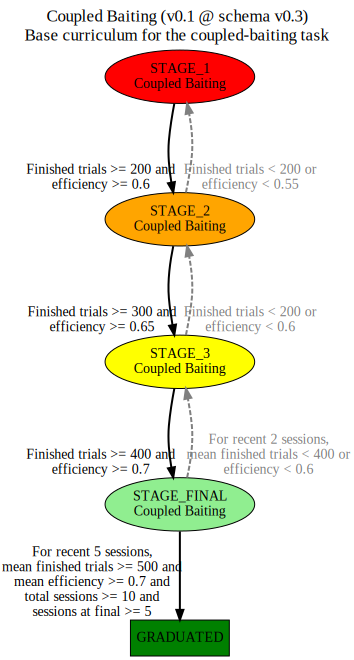

In [13]:
dot = loaded_curriculum.diagram_rules(path=path,
                                      render_file_format='svg')
dot


2024-01-03 16:48:42 | INFO | aind_auto_train.schema.curriculum | Curriculum parameters diagram saved to C:\Users\admin/capsule/results/curriculum//Coupled Baiting_curriculum_v0.1_schema_v0.3_paras


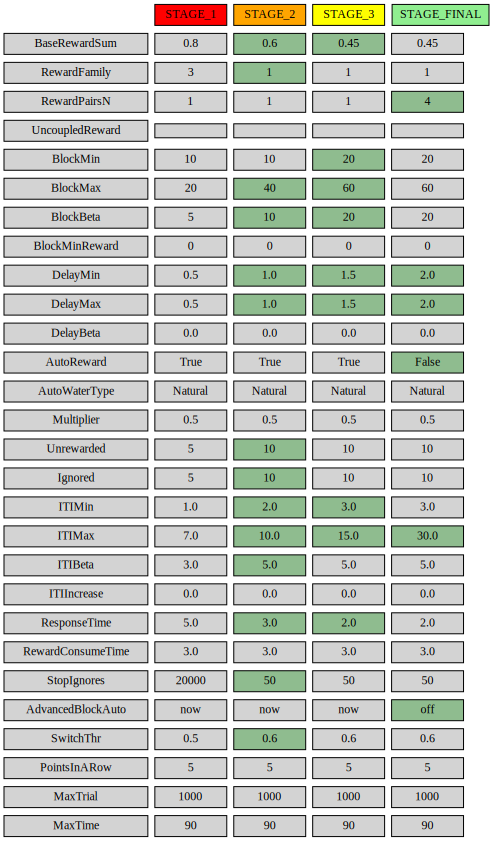

In [14]:
dot_paras = loaded_curriculum.diagram_paras(path=path,
                                            render_file_format='svg',
                                            fontsize=12)
dot_paras